In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import load_model
from common_variables import *

2025-03-28 10:39:58.841308: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2025-03-28 10:39:58.841326: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
df = pd.read_csv(test_time_series_path, dayfirst = True, index_col=['time'])

In [7]:
scaler = joblib.load(scaler_path)
df['Scaled'] = scaler['y_scaler'].transform(df[['Returns']].values)

In [8]:
model = load_model(model_path)

2025-03-28 10:41:00.371168: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2025-03-28 10:41:00.378882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-03-28 10:41:00.380093: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4090 computeCapability: 8.9
coreClock: 2.52GHz coreCount: 128 deviceMemorySize: 23.54GiB deviceMemoryBandwidth: 938.86GiB/s
2025-03-28 10:41:00.380129: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2025-03-28 10:41:00.380148: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic libr

In [9]:
scaled = df['Scaled'].values
X = []
len_scaled = len(scaled)
for i in range(window_size, len_scaled):
    X.append(scaled[i-window_size:i])
X = np.asarray(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y_true = scaled[-X.shape[0]:]
print(f"X {X.shape}, y_real {y_true.shape}")

X (3808, 256, 1), y_real (3808,)


In [10]:
mse = model.evaluate(X, y_true, verbose=1)
print("Mean Squared Error:", mse)

ValueError: in user code:

    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py:530 __call__
        return super(Bidirectional, self).__call__(inputs, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py:644 call
        initial_state=forward_state, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:663 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/steve/anaconda3/envs/calvin/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:227 assert_input_compatibility
        ', found shape=' + str(shape))

    ValueError: Input 0 is incompatible with layer forward_lstm: expected shape=(None, None, 4), found shape=[32, 256, 1]


In [ ]:
y_pred = model.predict(X)
y_pred.shape

(3840, 1)

In [ ]:
df['Pred_Scaled'] = np.pad(y_pred.reshape(y_pred.shape[0]), (window_size, 0), mode='constant', constant_values=np.nan)
df['Pred_Returns'] = scaler.inverse_transform(df[['Pred_Scaled']].values)
#df['Pred_MA'] = df["MA"].mul(1 + df['Pred_Returns'].shift(-1)).shift(1) # Arithmetic Returns
df['Pred_MA'] = df['MA'].mul(np.exp(df['Pred_Returns'].shift(-1))).shift(1) # Log Returns
df = df[window_size:]
df

,HLAvg,MA,Returns,Scaled,Pred_Scaled,Pred_Returns,Pred_MA
Date,,,,,,,
2022-10-02 21:00:00+00:00,0.979770,0.976052,0.001140,0.673910,0.690213,0.001239,0.976148
2022-10-03 01:00:00+00:00,0.980680,0.976630,0.000593,0.583807,0.590462,0.000633,0.976670
2022-10-03 05:00:00+00:00,0.980945,0.977319,0.000704,0.602226,0.586813,0.000611,0.977227
2022-10-03 09:00:00+00:00,0.978270,0.978002,0.000699,0.601302,0.652865,0.001012,0.978308
2022-10-03 13:00:00+00:00,0.980115,0.978997,0.001017,0.653678,0.606917,0.000733,0.978719
...,...,...,...,...,...,...,...
2025-03-21 01:00:00+00:00,1.084155,1.088478,-0.000681,0.374131,0.391411,-0.000576,1.088592
2025-03-21 05:00:00+00:00,1.083280,1.087720,-0.000696,0.371513,0.358410,-0.000776,1.087633
2025-03-21 09:00:00+00:00,1.084300,1.087051,-0.000615,0.384906,0.383528,-0.000624,1.087042


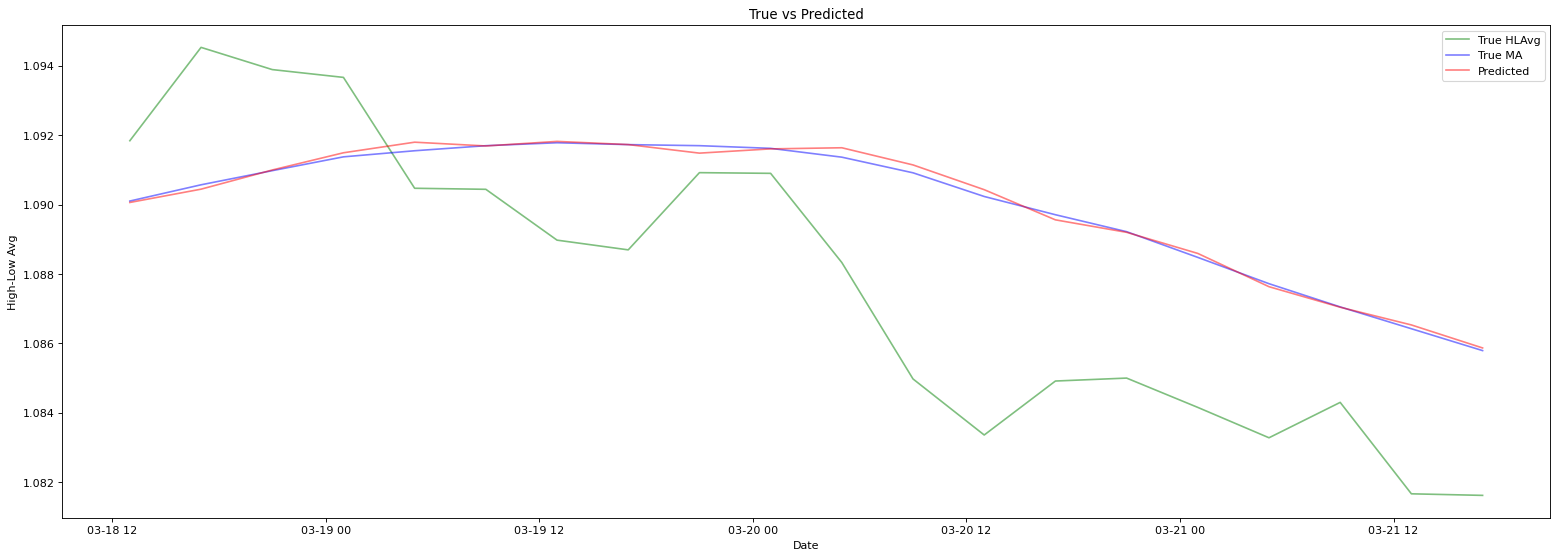

In [ ]:
plt.figure(figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['HLAvg'][-20:], color = 'green', label = 'True HLAvg', alpha=0.5)
plt.plot(df['MA'][-20:], color = 'blue', label = 'True MA', alpha=0.5)
plt.plot(df['Pred_MA'][-20:], color = 'red', label = 'Predicted', alpha=0.5)
plt.title('True vs Predicted')
plt.xlabel('Date')
plt.ylabel('High-Low Avg')
plt.legend()
plt.show()